In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plot_tools as pt

In [2]:
import mectools.plot as mp
import plotbot.client as pb

In [3]:
idx = pd.IndexSlice

In [4]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### County Info

In [5]:
dtypes_county = {'county_fips': 'str'}
county = pd.read_csv('/home/doug/work/coronavirus/data/geo/county_populations.csv', dtype=dtypes_county)
popul = county.set_index('county_fips')['pop18']
weight = popul/popul.mean()

### Safegraph Data

In [6]:
# load in all data
dtypes = {'county_fips': 'str', 'naics_code': 'str', 'visits': 'int'}
dpath = '/home/doug/work/coronavirus/data/safegraph/visits_industry_county_date.csv'
visits = pd.read_csv(dpath, dtype=dtypes, parse_dates=['date'])

# aggregate to 3-digit naics
visits['naics_3'] = visits['naics_code'].str.slice(0, 3)
visits = visits.groupby(['county_fips', 'date', 'naics_3']).sum()

# normalize by pre-period
pre_beg, pre_end = pd.to_datetime(['2020-01-01', '2020-03-01'])
visits_pre = visits.loc[idx[:, pre_beg:pre_end, :], 'visits'].mean(level=['county_fips', 'naics_3'])
visits = visits.join(visits_pre.rename('visits_pre'))
visits['visits_norm'] = visits['visits']/visits['visits_pre']

# tabulate overall levels
visits = visits.join(visits_pre.sum(level='county_fips').rename('visits_tot'))
visits = visits[visits['visits_tot'] >= 2000]

In [11]:
def plot_industry(ind, title=''):
    indus = visits.loc[idx[:, ind, :], 'visits_norm'].unstack('county_fips').loc[ind]
    base = pd.Series(100*np.ones(len(indus)), index=indus.index)
    fig, ax = plt.subplots()
    mp.path_dist(100*indus.rolling(7).mean(), wgt=weight, ax=ax)
    base.plot(
        ax=ax, color='black', linestyle='--', linewidth=1,
        title=title, ylim=(0, 120)
    )
    ax.set_xlabel('')
    return fig, ax

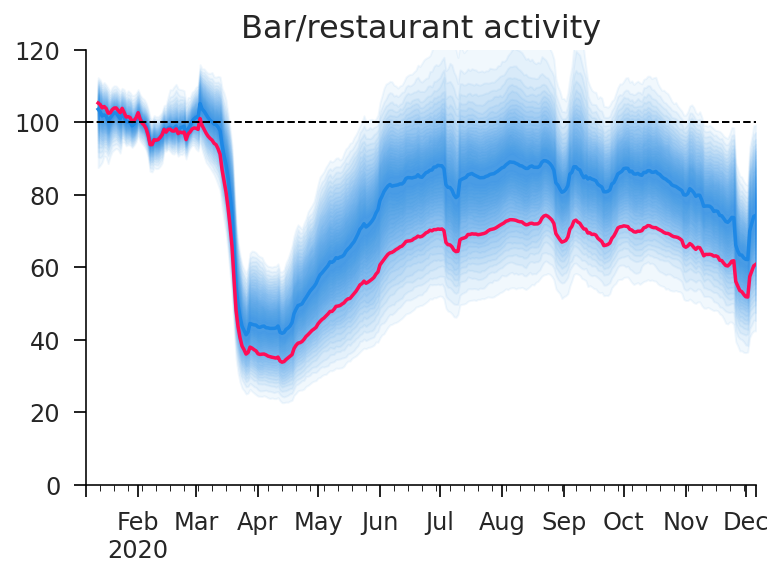

In [12]:
plot_industry('722', 'Bar/restaurant activity');

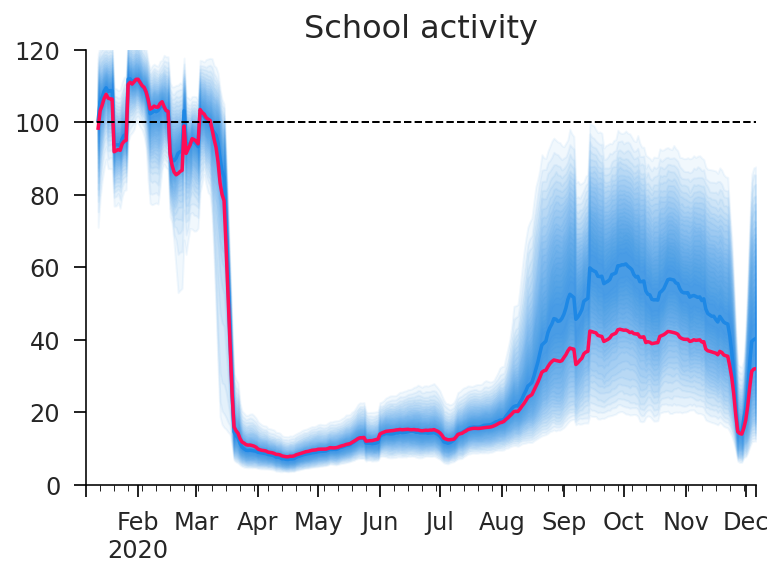

In [13]:
plot_industry('611', 'School activity');

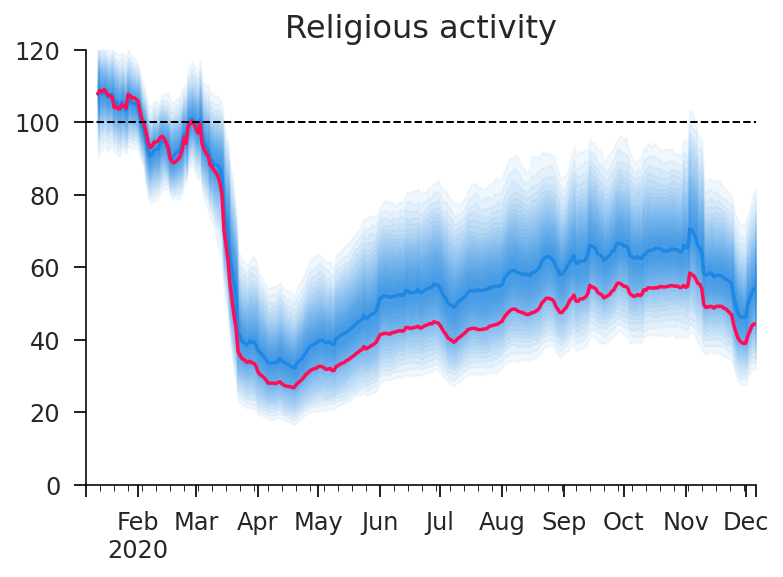

In [14]:
plot_industry('813', 'Religious activity');